In [1]:
import numpy as np
import matplotlib.pyplot as plt
from littlefish.core.fish import Eye

In [2]:
# define colors
eye_rgb = np.array([153, 0, 0], dtype=int)
body_rgb = np.array([241, 196, 15], dtype=int)
vf_cmap = "Reds"  # visual field colormap
env_rgb = np.array([102, 178, 255], dtype=int)  # environment

In [5]:
def get_base_map_rgb(body_rgb):
    base_map = np.ones((9, 9, 3), dtype=int)
    for ch in range(3):
        base_map[:, :, ch] = env_rgb[ch]
    
    for body_row in range(3, 6):
        for body_col in range(3, 6):
            base_map[body_row, body_col, :] = body_rgb

    return base_map


def get_RGB_from_cmap(cmap:str, value: float):
    value = np.clip(value, 0, 1)
    cmap_obj = plt.get_cmap(cmap)
    rgb = cmap_obj(value)[:3]
    rgb = (np.array(rgb) * 255).astype(int)
    return rgb

    
def add_eye_and_visual_field(base_map, eye_rgb, vf_cmap, direction):

    eye = Eye(direction=direction)
    body_position = np.array([4, 4])

    if direction == "east":
        eye_position = np.array([0, 1])
    elif direction == "west":
        eye_position = np.array([0, -1])
    elif direction == "north":
        eye_position = np.array([-1, 0])
    elif direction == "south":
        eye_position = np.array([1, 0])
    
    eye_position = eye_position + body_position

    vf_positions = eye._get_rf_positions()
    vf_positions[:, 0] = vf_positions[:, 0] + body_position[0]
    vf_positions[:, 1] = vf_positions[:, 1] + body_position[1]

    input_filter = eye.get_input_filter()
    input_filter = input_filter / 0.2  # to darken the color
    filter_rgb = []
    for input in input_filter:
        filter_rgb.append(get_RGB_from_cmap(cmap=vf_cmap, value=input))
    filter_rgb = np.array(filter_rgb, dtype=int)
    
    base_map = base_map.copy()
    base_map[eye_position[0], eye_position[1], :] = eye_rgb

    for vf_idx in range(4, 16):
        base_map[vf_positions[vf_idx, 0], vf_positions[vf_idx, 1], :] = filter_rgb[vf_idx]

    return base_map

def plot_map(map_to_plot, ax):
    ax.imshow(map_to_plot)
    ax.set_axis_off()
    coors = [[2.5, 2.5], [5.5, 2.5], [5.5, 5.5], [2.5, 5.5], [2.5, 2.5]]
    coors = np.array(coors)
    ax.plot(coors[:, 0], coors[:, 1], ls='-', color='#555555')


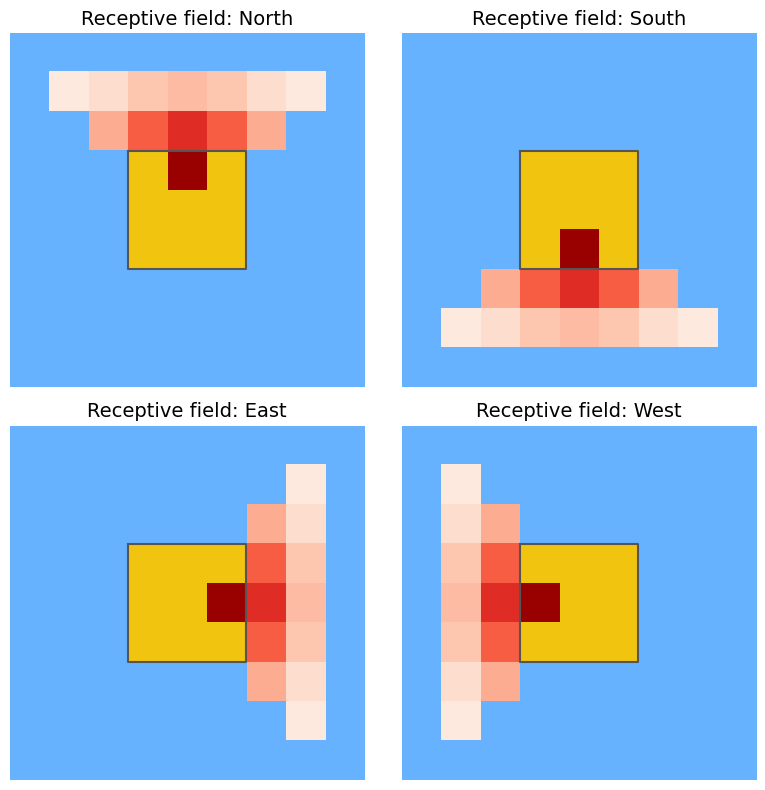

In [10]:
f, axs = plt.subplots(2, 2, figsize=(8, 8))

map_base = get_base_map_rgb(body_rgb)
map_north = add_eye_and_visual_field(map_base, eye_rgb, vf_cmap, direction='north')
map_south = add_eye_and_visual_field(map_base, eye_rgb, vf_cmap, direction='south')
map_east = add_eye_and_visual_field(map_base, eye_rgb, vf_cmap, direction='east')
map_west = add_eye_and_visual_field(map_base, eye_rgb, vf_cmap, direction='west')
plot_map(map_north, axs[0, 0])
plot_map(map_south, axs[0, 1])
plot_map(map_east, axs[1, 0])
plot_map(map_west, axs[1, 1])

axs[0, 0].set_title("Receptive field: North", fontsize=14)
axs[0, 1].set_title("Receptive field: South", fontsize=14)
axs[1, 0].set_title("Receptive field: East", fontsize=14)
axs[1, 1].set_title("Receptive field: West", fontsize=14)
plt.tight_layout()
